## SET 5
### Bahador Amjadi
### 2040470

#### please install the essential packages before running the code

In [1]:
library(ggplot2)
library(reshape2)
library(lubridate)
library(tibble)
library(dplyr)
library(lattice)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
install.packages("gridExtra")

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Enkidu\AppData\Local\Temp\RtmpWu0xaq\downloaded_packages


In [3]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



### Exercise 1

In [4]:
mean.finder <- function(numbers, alpha, lambda){
    an.mean  <<- alpha/lambda;  an.var  <<- alpha/(lambda**2)  
    num.mean <<- mean(numbers); num.var <<- var(numbers)
    num.median <<- median(numbers)}

#a function that finds 95 credibility interval
cred.finder <- function(post.function){
    k <-0; integral <-1; interval <- 0.95
    while (integral > 0.95){k <- k + 0.01; integral <- integrate(post.function, k,8-k)$value}
    return (c(k, 1-k))}

post.func <- function(x){return(dgamma(x, shape = alpha.pos ,rate= lambda.pos))}

In [5]:
# a function that plots prior, posterior, likelihood at the same time
all.plotter <- function(numbers, prior, ylim){
    if (prior == 'Jeffrey'){               #jeffrey prior: alpha:0.5, lambda: 0 
        alpha.prior <<- 0.5; lambda.prior <<- 0
        alpha.pos  <<- sum(numbers)    + 0.5
        lambda.pos <<- length(numbers)}
    else if(prior == 'Uniform'){           #uniform prior: alpha:1, lambda: 0 
        alpha.prior <<- 1; lambda.prior <<- 0
        alpha.pos  <<- sum(numbers)    + 1
        lambda.pos <<- length(numbers)}  
    else {cat("unrecognized prior function!")}
        
    q1 = qgamma(0.05,shape = alpha.pos ,scale = 1/lambda.pos)
    q2 = qgamma(0.95,shape = alpha.pos ,scale= 1/lambda.pos)
        
    mean.finder(numbers, alpha.pos, lambda.pos)
#     a <<- cred.finder(post.func)
    p.post  <- dgamma(x=p,shape = alpha.pos ,rate= lambda.pos)
    plot(p, p.post , col="black",lwd = 3, type="l",ylim = ylim,xlab="P", ylab="Density")
    abline(v=an.mean,    col="firebrick3" )
    abline(v=num.median,  col="navyblue" )
    abline(v=num.mean,   col="green4" )
    abline(v=q1,   col="snow4" ,lty = 2)
    abline(v=q2,   col="snow4" ,lty = 2)
    
    legend(4,0.6, col=c("firebrick3", "navyblue", "green4","snow4","snow4"),box.lty=0,lty=1:1,cex=1.2,
            legend=c(parse(text = paste0('Analytical.Mean==',    round(an.mean, 3))),
                     parse(text = paste0('Analytical.Median==',  round(num.median,3))),
                     parse(text = paste0('Numerical.Median==',   round(num.mean, 3))),
                     parse(text = paste0('q(0.05)==' ,           round(q1,3))),
                     parse(text = paste0('q(0.095)==',           round(q2,3)))))    
    text(5.05,0.2 , col="red",
         lwd = 1, pos=4, cex=1.2, paste("Analytical Variance: ", an.var , sep=""))
    text(5.05,0.25 , col="red",
         lwd = 1, pos=4, cex= 1.2, paste("Numerical Variance: ", num.var , sep=""))
    title(main=paste("Posterior Dist,", prior, "Prior"), line=0.7, cex.main=1.4)}

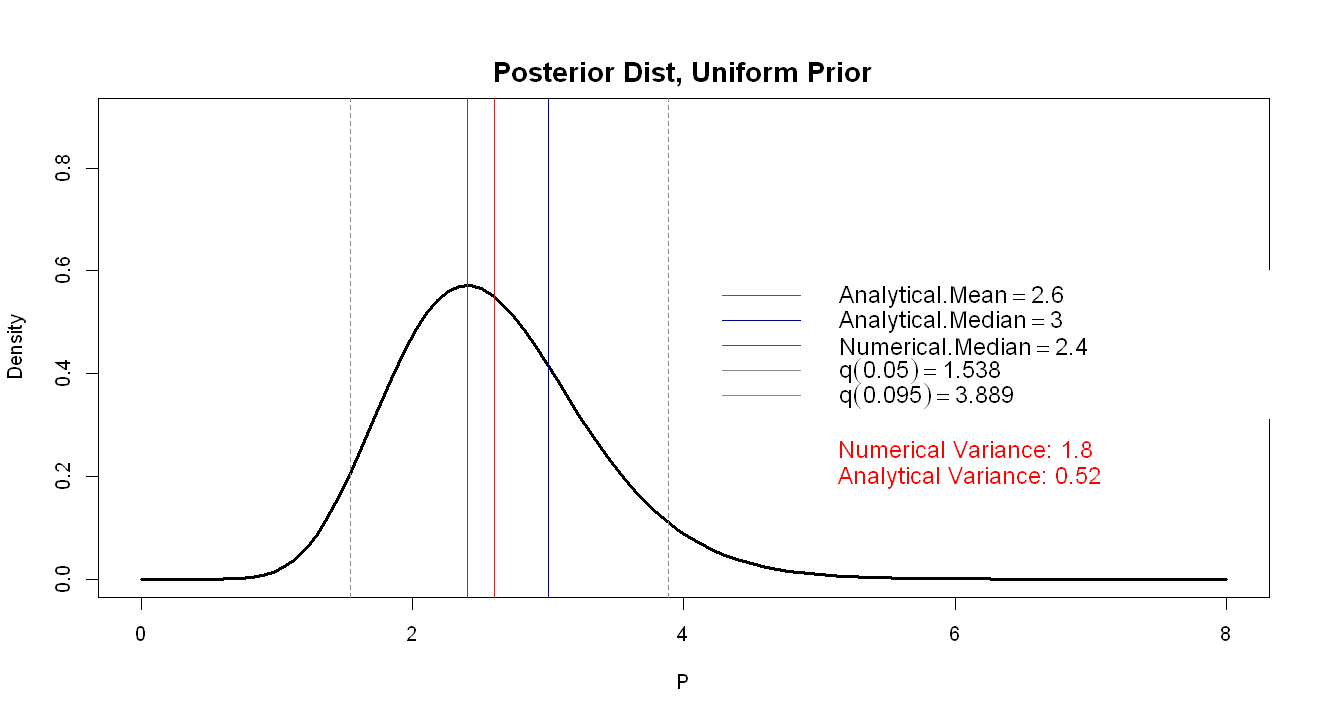

In [6]:
#fixing some global paramteres
p     <<- seq(from= 0,to=8,length.out = 100)
options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots

numbers <- c(4,1,3,1,3)
ylim <- c(0,0.9)  #setting the y axis range
#all.plotter(n,r, prior function, E[x], STD[x]), in case of unifrom dummy exp and std
all.plotter(numbers,'Uniform', ylim)

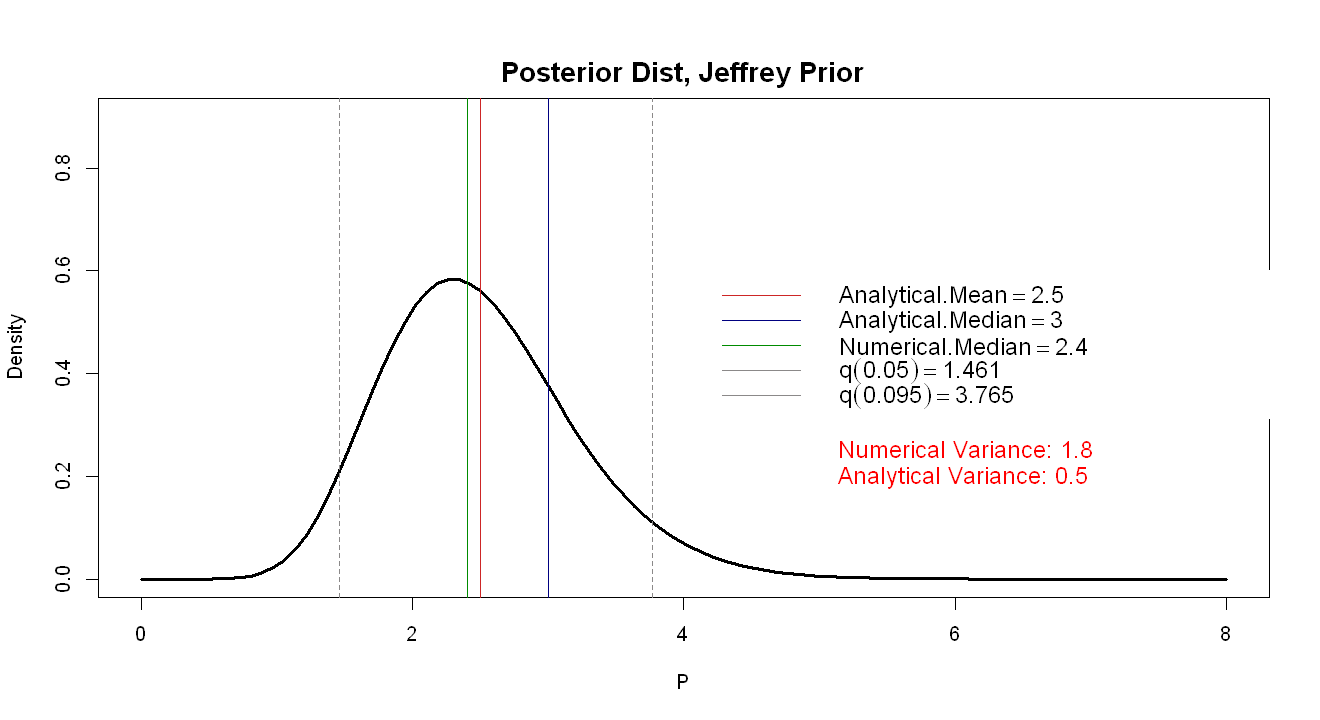

In [7]:
all.plotter(numbers,'Jeffrey', ylim)

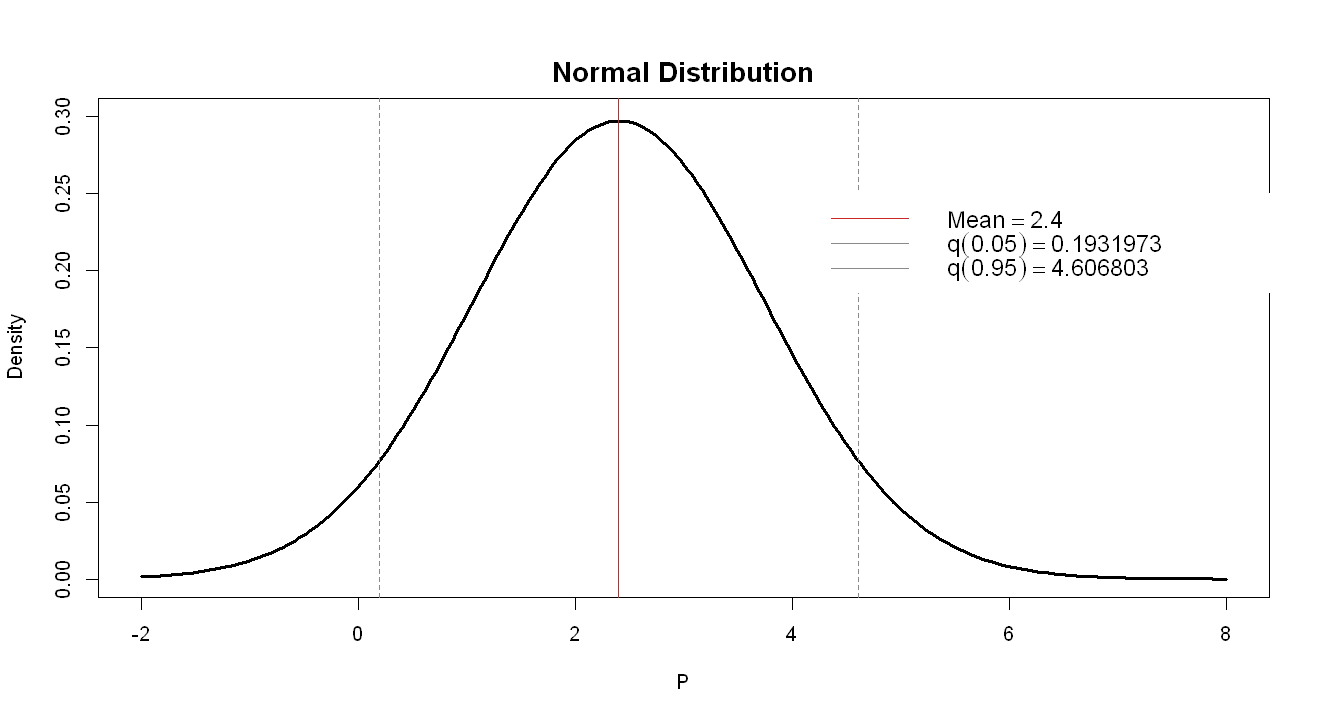

In [8]:
set.seed(205)
q1 <- qnorm(0.05,num.mean,sqrt(num.var))
q2 <- qnorm(0.95,num.mean,sqrt(num.var))
plot(seq(from=-2,to=8,length.out=200), dnorm(seq(from=-2,to=8,length.out=200),num.mean, sqrt(num.var)), 
     col="black",lwd = 3, ylim=c(0,0.3),type="l", xlab="P", ylab="Density")
abline(v=num.mean,    col="firebrick3")
abline(v=q1,          col="snow4",    lty = 2)
abline(v=q2,          col="snow4",    lty = 2)

legend(4,0.25, col=c("firebrick3", "snow4","snow4" ), box.lty=0, lty=1:1, cex=1.2,
            legend=c(parse(text = paste0('Mean==',  round(num.mean, 3))),
                     parse(text = paste0('q(0.05)==', q1  )),
                     parse(text = paste0('q(0.95)==', q2  ))))  
title(main=paste("Normal Distribution"), line=0.7, cex.main=1.4)

### Exercise 2

In [9]:
p.log.like <- function(alpha,beta, data){
    logL <- 0.0
    for (x in data) {logL <- logL - log(1 + ((x-alpha)/beta)**2)}
return(logL)}

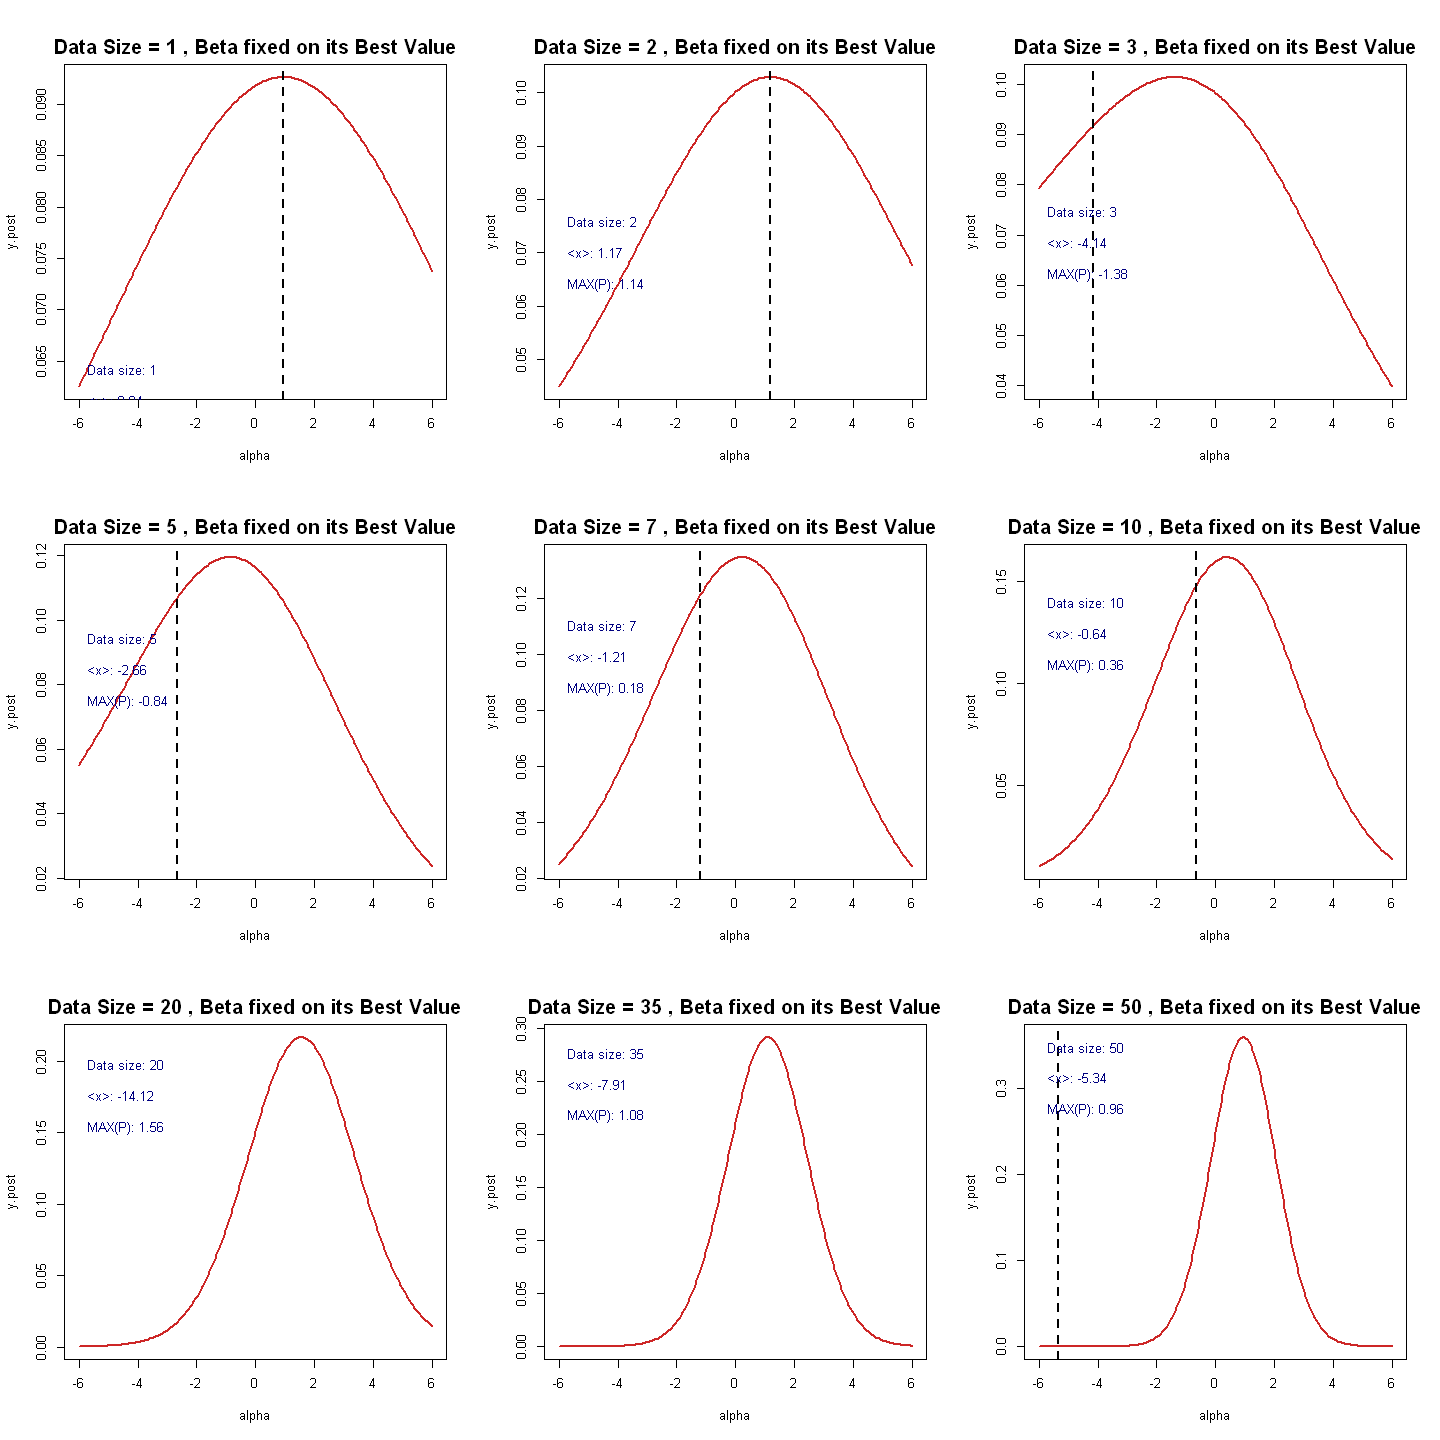

In [10]:
set.seed(205)
options(repr.plot.width=12, repr.plot.height =12)  #changing size of plots
#For the case in which both alpha and beta are unknown, we add a loop on beta to the former case of only unknown beta which
# was discussed in the lecture note. then we find the most probable value and the corresponding alpha and beta in a 2d matrix
#for random sampling we choose random theata (since theta dist. is uniform), 
#according to x = beta * tan(theta) + alpha then calculate the corresponding x
theta        <- runif(1000, min = 0, max = pi)
data         <- 1 * tan(theta) + 1    #we assume the true alpha and beta are alpha=1 and beta=1
beta.list    <- seq(from= 0.1,to=10, length.out=50)
size.list    <- c(1,2,3,5,7,10,20,35,50)     # a list for the different n size we want to loop on

all.log.star <- vector()   #stores best alpha for different values of beta
all.alpha    <- vector()   #stores best probs. for different values if beta

n.sample     <- 200
x.min        <- -6; x.max <- +6
h            <- (x.max - x.min)/n.sample
alpha        <- seq(from=x.min, by=h, length.out=n.sample+1)

set.seed(206)
par(mfrow=c(3,3))
for (n.plot in size.list){   #we find the best beta for each data set size
    dt       <- data[1:n.plot]
    for (beta in beta.list){
        # Get the LogLikelihood
        y.log.star   <- p.log.like(alpha ,beta, dt)   #for a specific beta
            y.post.star  <- exp(y.log.star)

        
        # - Find the maximum prob and the storing its corresponding alpha for a specific beta
        index.max    <- which.max(y.log.star)
        alpha.max    <- alpha [index.max]
        all.log.star <- append(all.log.star, max(y.log.star))
        all.alpha    <- append(all.alpha, alpha.max)
    #   all.beta     <- no need to store beta values, since we already have them in beta.list
        }
        # - get the exponential and normalize the posterior
    gloabl.index.max    <- which.max(all.log.star)  #index of global best prob. for a specific data size
    global.prob.max     <- all.log.star[gloabl.index.max]  #value of global best prob. for a specific data size
    global.alpha.max    <- all.alpha   [gloabl.index.max]  #best global alpha for a specific data size
    global.beta.max     <- beta.list   [gloabl.index.max]  #best global beta for a specific data size
    
    y.log.star   <- p.log.like(alpha , global.beta.max, dt)  #finding pdf of alpha for the best beta
    y.post.star  <- exp(y.log.star)
    y.post       <- y.post.star/(h*sum(y.post.star)) 
    
    plot(alpha , y.post , type="l", lwd=2, col="firebrick3")
    dt.mean <- mean(dt)
    abline(v=dt.mean , lty=2, lwd=2)
    y.band <- (max(y.post) - min(y.post))*0.05
    text(-6, max(y.post)+y.band -0.03 ,    col="navy", lwd = 2, pos=4,
    paste("Data size: ", n.plot , sep=""))
    text(-6, max(y.post)-y.band -0.03,    col="navy", lwd = 2, pos=4,
    sprintf("<x>: %.2f", dt.mean))
    text(-6, max(y.post)-3*y.band-0.03 ,  col="navy", lwd = 2, pos=4,
    sprintf("MAX(P): %.2f", alpha.max))
    title(main=paste("Data Size =", n.plot, ", Beta fixed on its Best Value"), line=0.7, cex.main=1.5)}

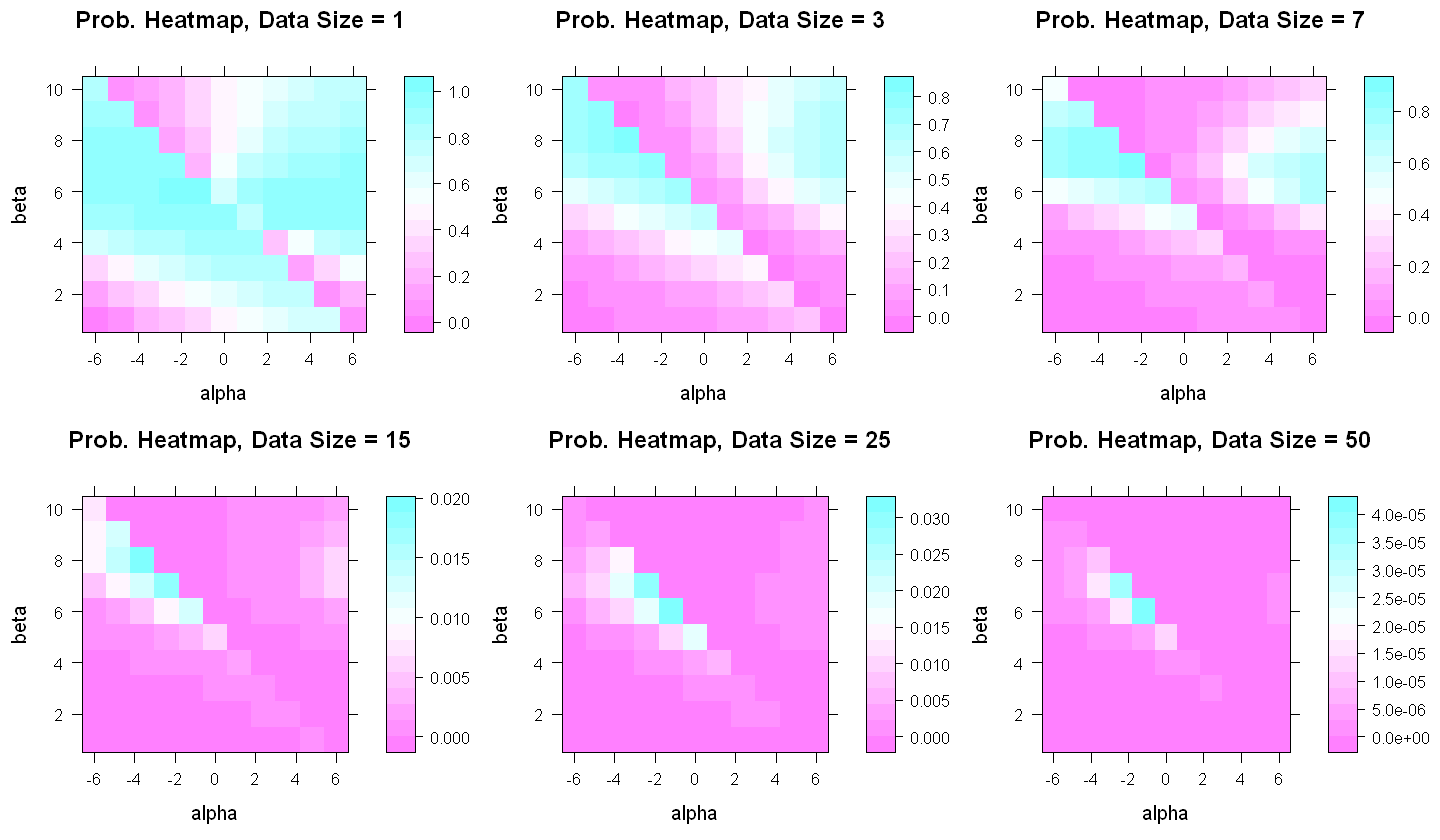

In [11]:
# Now we investigate the heatmap of prob. as a function of alpha and beta for each size
# For easier illustration we limit ourselves to 4 different data size
options(repr.plot.width=12, repr.plot.height =7)  #changing size of plots
set.seed(206)

#a function the helps plotting multiple heatmapas for differnt dize of data
level.finder <- function(data.size){
    theta        <- runif(1000, min = 0, max = pi)
    data         <- 1 * tan(theta) + 1    #we assume the true alpha and beta are alpha=1 and beta=1
    dt        <- data[1:data.size]
    n.sample  <- 10
    x.min     <- -6; x.max <- +6
    h         <- (x.max - x.min)/n.sample
    
    alpha     <- seq(from=x.min, by=h, length.out=n.sample+1)
    beta      <- seq(1,10, length.out=n.sample)
    prob      <- vector()
    
    for (a in alpha){
        for (b in beta){
            y.log.star <- p.log.like(a , b, dt)
            y.post.star<- exp(y.log.star)
            prob       <- append(prob, y.post.star) }}
    
    df        <- expand.grid(alpha=alpha, beta=beta)
    df$prob   <- prob
    return(levelplot(prob ~ alpha*beta, data=df  ,xlab="alpha",
        main=paste("Prob. Heatmap, Data Size =",data.size)))  }

#constructing levelplot for diffenet size of data, grid-based graphs are hard to work with in a loop
p1 <- level.finder(data.size = 1)
p2 <- level.finder(data.size = 3)
p3 <- level.finder(data.size = 7)
p4 <- level.finder(data.size = 15)
p5 <- level.finder(data.size = 25)
p6 <- level.finder(data.size = 50)
grid.arrange(p1, p2,p3,p4,p5,p6 ,ncol=3)

### Exercise 3, Part A

In [12]:
signal <-     function(x, a, b, x0, w, t) {t * (a*exp(-(x-x0)**2/(2*w**2)) + b)}
#==================================================================================
log.post <-   function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf)} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))}
#==================================================================================
#a function that calculates z, given w, xdat, ddat and s.true
z.finder.w <-   function(w, A.true, B.true, x0, Delta.t, a, b){
    xdat <-   seq(from=-7, to=7, by=0.5*w)
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)    
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
    for(k in 1:length(b)) {
    z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)}}
    z <- z - max(z) }
#==================================================================================
#a function that finds a and b and sets the x,y limits
lim.finder <- function(alim, blim){
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <<- diff(alim)/Nsamp
delta_b <<- diff(blim)/Nsamp
a <<- alim[1] + diff(alim)*uniGrid
b <<- blim[1] + diff(blim)*uniGrid }

In [13]:
x0      <- 0      # Signal peak
A.true  <- 2  # Signal amplitude
B.true  <- 1  # Background amplitude
Delta.t <- 5 # Exposure time
w.list  <- c(0.1,0.25,1,2,3)   #resolution different values

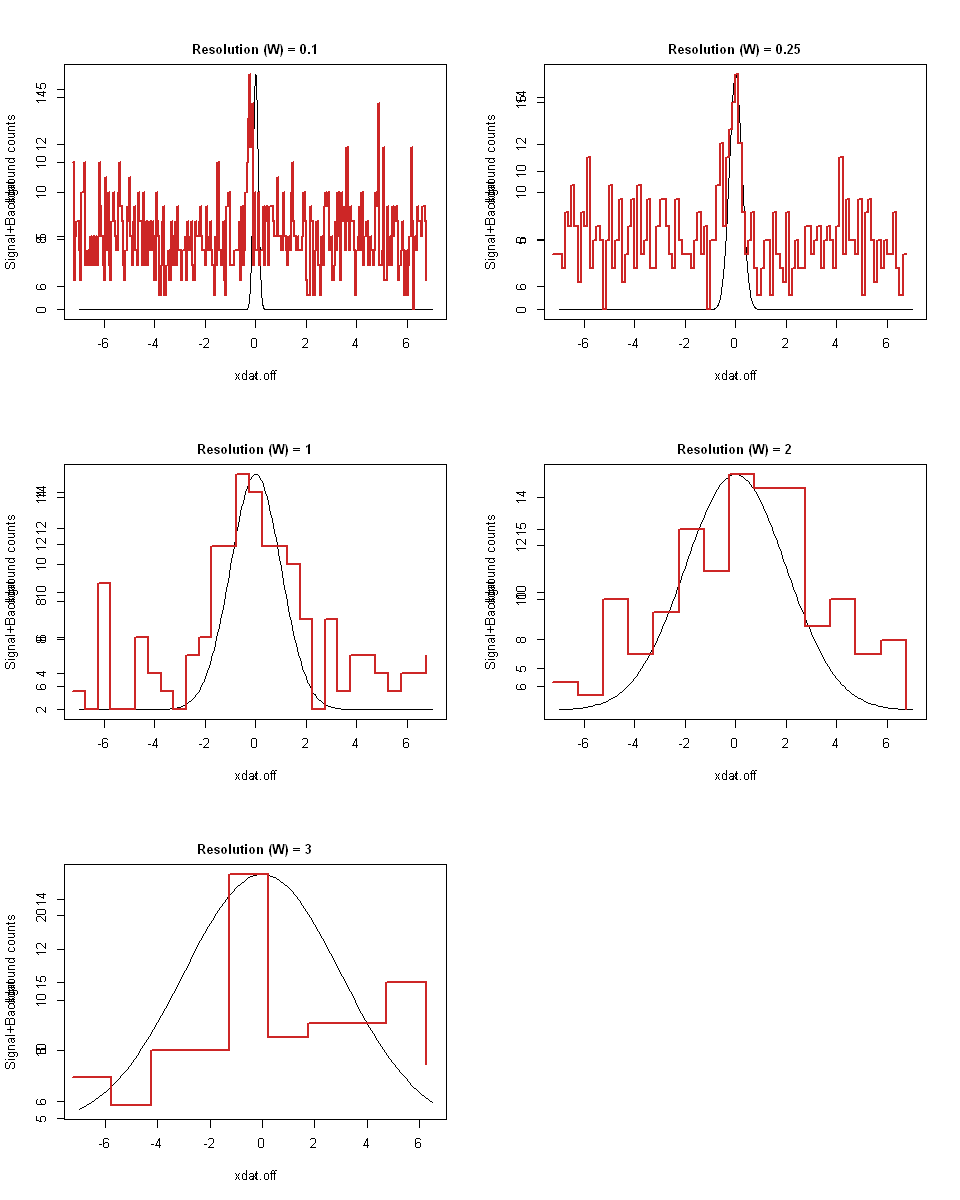

In [14]:
options(repr.plot.width=8, repr.plot.height =10)  #changing size of plots
par(mfrow=c(3,2))
set.seed(205)

for (w in w.list){
# - Generate the observed data
xdat <-   seq(from=-7, to=7, by=0.5*w)
s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
ddat <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
plot(xplot , splot ,xlab="x", ylab="Signal+Background counts", type ='l')
par(new=TRUE)
xdat.off <- xdat -0.25
plot(xdat.off, ddat , type="s",col="firebrick3", lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)}

In [15]:
alim <- c(0, 4)
blim <- c(0, 2.6)
lim.finder(alim, blim)   #this function finds a and b

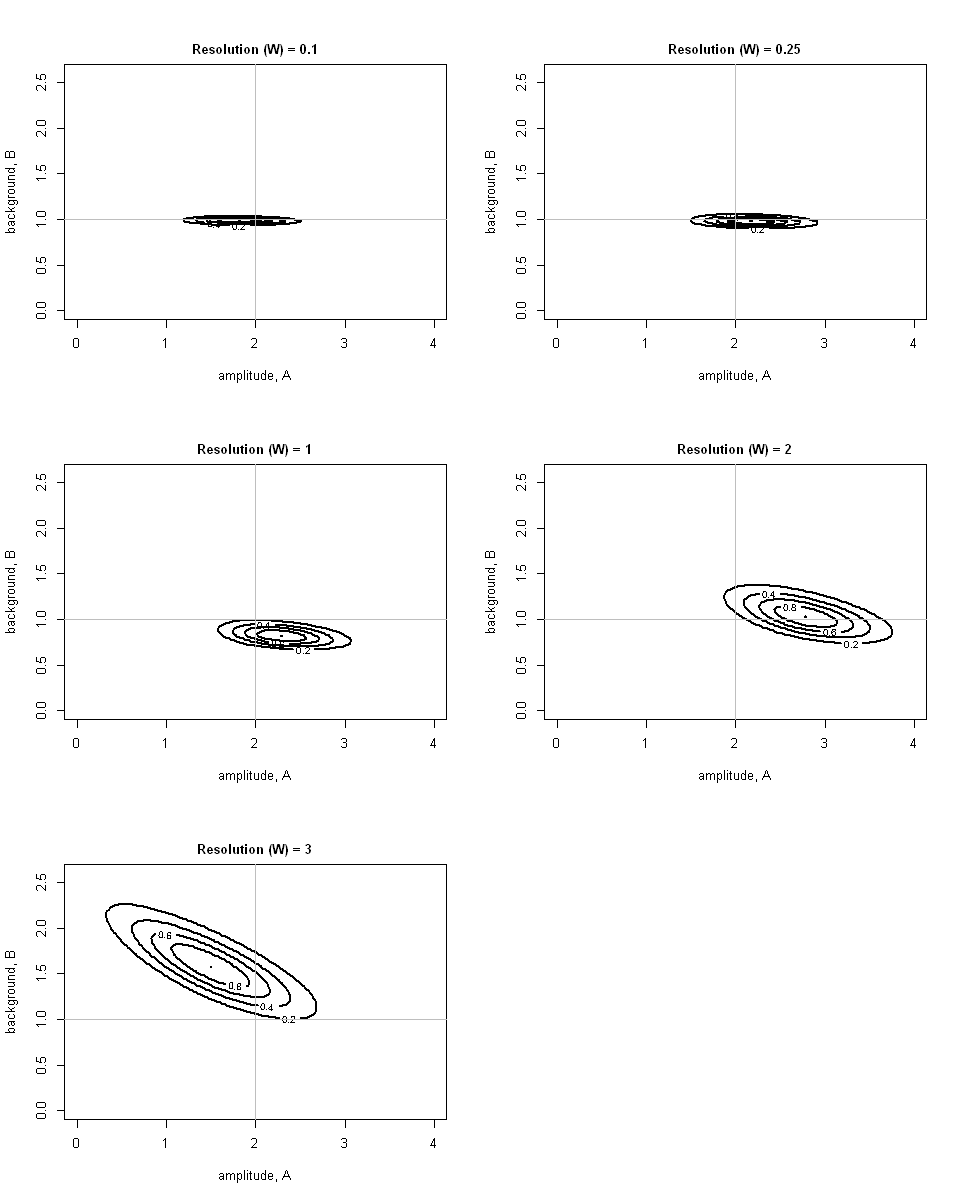

In [16]:
set.seed(205)
par(mfrow=c(3,2))
for (w in w.list){
z <- z.finder.w(w, A.true, B.true, x0, Delta.t, a, b)  
# Plot unnormalized 2D posterior as contours.
contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2,xlab="amplitude, A",ylab="background, B")
abline(v=2,h=1,col="grey")
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)}

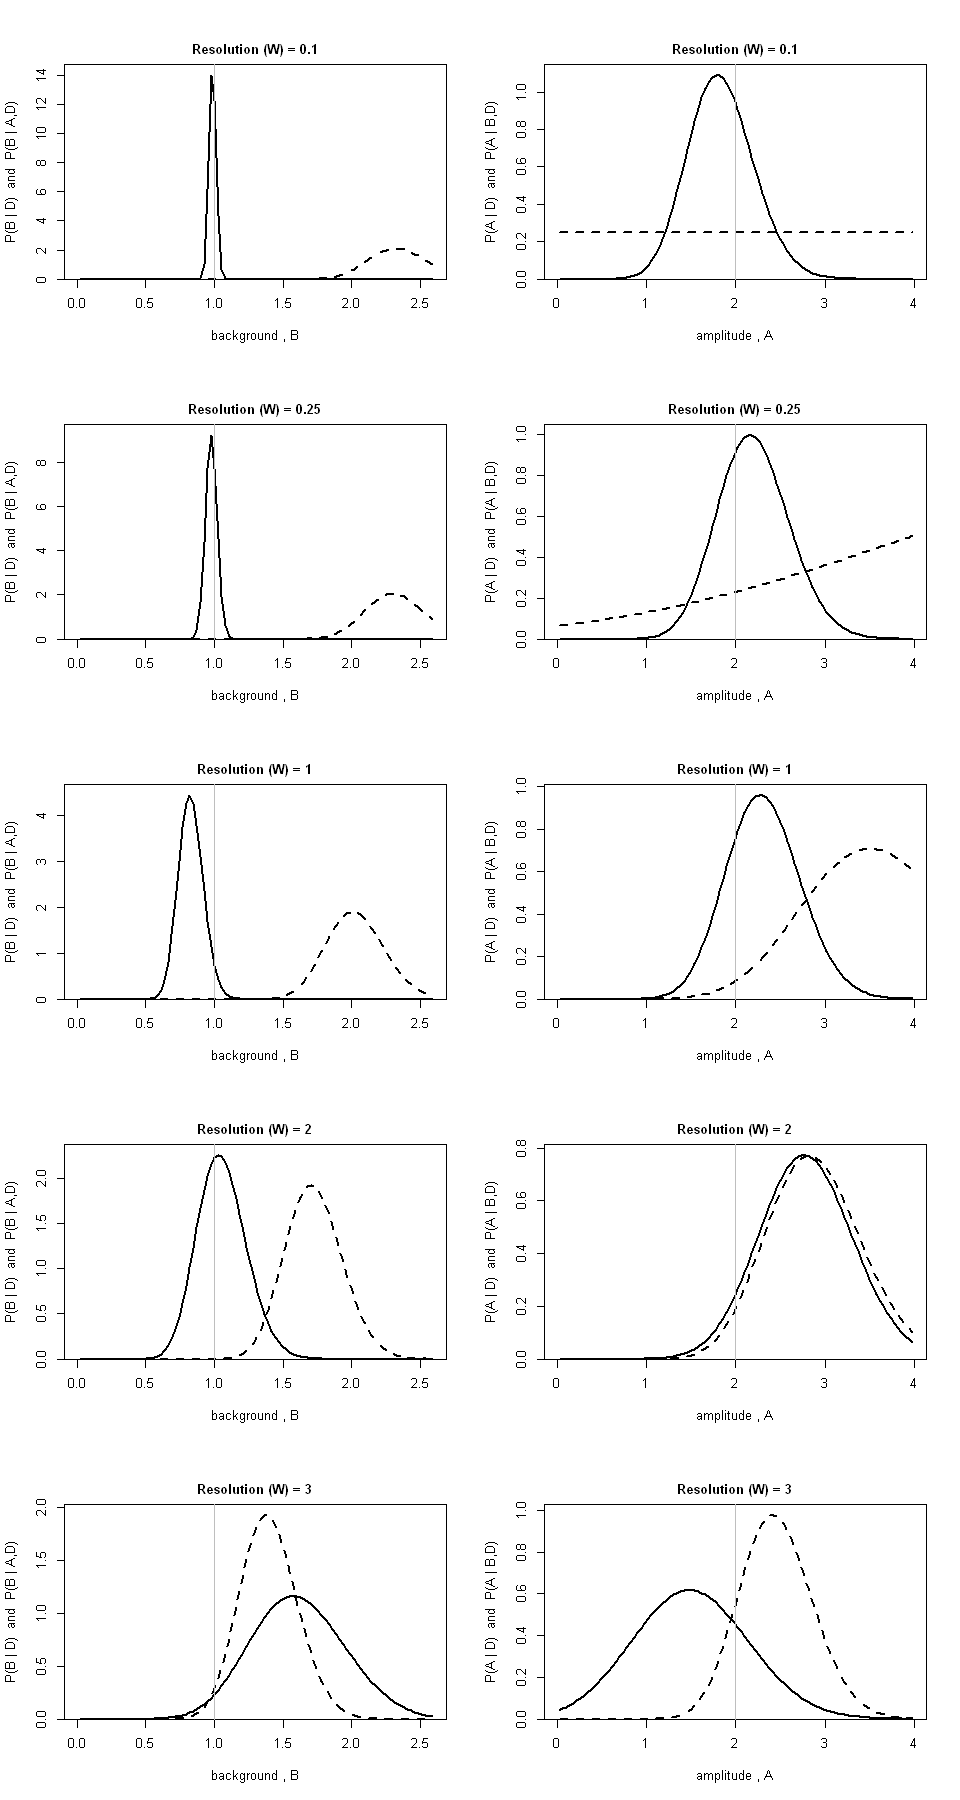

In [17]:
set.seed(205)
par(mfrow=c(5,2))
options(repr.plot.width=8, repr.plot.height =15)  #changing size of plots
for (w in w.list){
z <- z.finder.w(w, A.true, B.true, x0, Delta.t, a, b)
    
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
# using true values of conditioned parameters. Vectorize(func , par)
# makes a vectorized function out of func in the parameter par.
p_a_bD <- exp(Vectorize(log.post , "a")(ddat , xdat , a, B.true ,
x0, w, Delta.t))
p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
p_b_aD <- exp(Vectorize(log.post , "b")(ddat , xdat , A.true , b,
x0, w, Delta.t))
p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
# par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
# Plot the 1D marginalized posteriors
plot(b, p_b_D, xlab="background , B", yaxs="i",
ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)  and  P(B | A,D)",
type="l", lwd=2)
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)
lines(b, p_b_aD, lwd=2, lty=2)
abline(v=B.true , col="grey")
plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)",
type="l", lwd=2)
lines(a, p_a_bD, lwd=2, lty=2)
abline(v=A.true , col="grey")
title(main=paste("Resolution (W) =", w), line=0.7, cex.main=1)}

In [18]:
set.seed(205)
for (w in c(0.1,0.25,1,2,3)){
z <- z.finder.w(w, A.true, B.true, x0, Delta.t, a, b)  
    
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute mean , standard deviation , covariance , correlation , of A and B
mean_a <- delta_a * sum(a * p_a_D)
mean_b <- delta_b * sum(b * p_b_D)
sd_a <- sqrt( delta_a * sum((a-mean_a)**2 * p_a_D) )
sd_b <- sqrt( delta_b * sum((b-mean_b)**2 * p_b_D) )
# Covariance nurmalization is performed with ’brute force ’
# The normalization constant is Z = delta_a*delta_b*sum(exp(z)).
# This is independent of (a,b) so can be calculated outside of the loops.
cov_ab <- 0
for(j in 1:length(a)) {
for(k in 1:length(b)) {
cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])}}
    
cov_ab <- cov_ab / sum(exp(z))
rho_ab <- cov_ab / (sd_a * sd_b)
cat("The resolution (w):", w,"\n")
cat("  a = ", mean_a, "+/-", sd_a, "\n")
cat("  b = ", mean_b, "+/-", sd_b, "\n")
cat("rho = ", rho_ab, "\n","\n")}

The resolution (w): 0.1 
  a =  1.83596 +/- 0.3674777 
  b =  0.9850387 +/- 0.02684706 
rho =  -0.1117512 
 
The resolution (w): 0.25 
  a =  2.201094 +/- 0.4019566 
  b =  0.9766824 +/- 0.04329026 
rho =  -0.1882773 
 
The resolution (w): 1 
  a =  2.312475 +/- 0.4167116 
  b =  0.8278004 +/- 0.09028635 
rho =  -0.3751633 
 
The resolution (w): 2 
  a =  2.776647 +/- 0.5015319 
  b =  1.055619 +/- 0.1781988 
rho =  -0.5698751 
 
The resolution (w): 3 
  a =  1.513588 +/- 0.6313239 
  b =  1.608978 +/- 0.3366032 
rho =  -0.7809911 
 


### Exercise 3, Part B

In [19]:
#a function that calculates z, given ratio, ddat and s.true
z.finder.ratio <-   function(ratio, A.true, x0, Delta.t, a, b){
    B.true <- A.true /ratio
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
    for(k in 1:length(b)) {
    z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)}}
    z <- z - max(z) }

In [20]:
x0         <- 0             # Signal peak
w          <- 1
A.true     <- 1             # Signal amplitud
Delta.t    <- 5             # Exposure time
ratio.list <- c(1,2,10,50)  #ratio = A.true/B.true

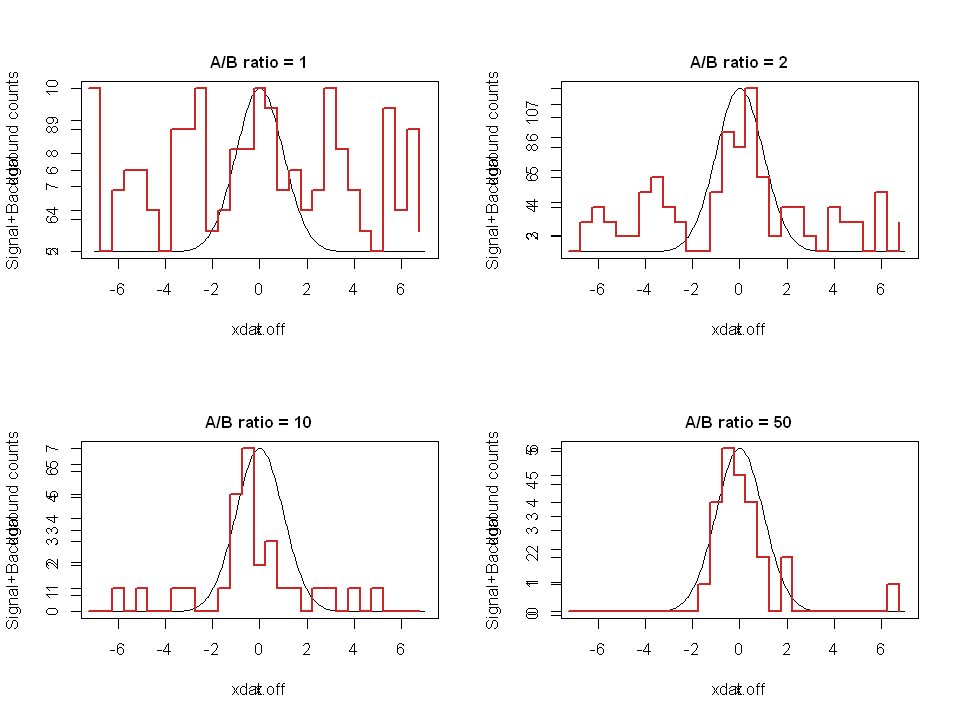

In [21]:
par(mfrow=c(2,2))
set.seed(205)
options(repr.plot.width=8, repr.plot.height =6)  #changing size of plots
for (ratio in ratio.list){
B.true <- A.true /ratio
# - Generate the observed data
xdat <-   seq(from=-7*w, to=7*w, by=0.5*w)
s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
ddat <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
plot(xplot , splot ,xlab="x", ylab="Signal+Background counts", type ='l')
par(new=TRUE)
xdat.off <- xdat -0.25
plot(xdat.off, ddat , type="s",col="firebrick3", lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat)))
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1) }

In [22]:
alim <- c(0, 4)
blim <- c(0, 2.6)
lim.finder(alim, blim) #this function finds a and b

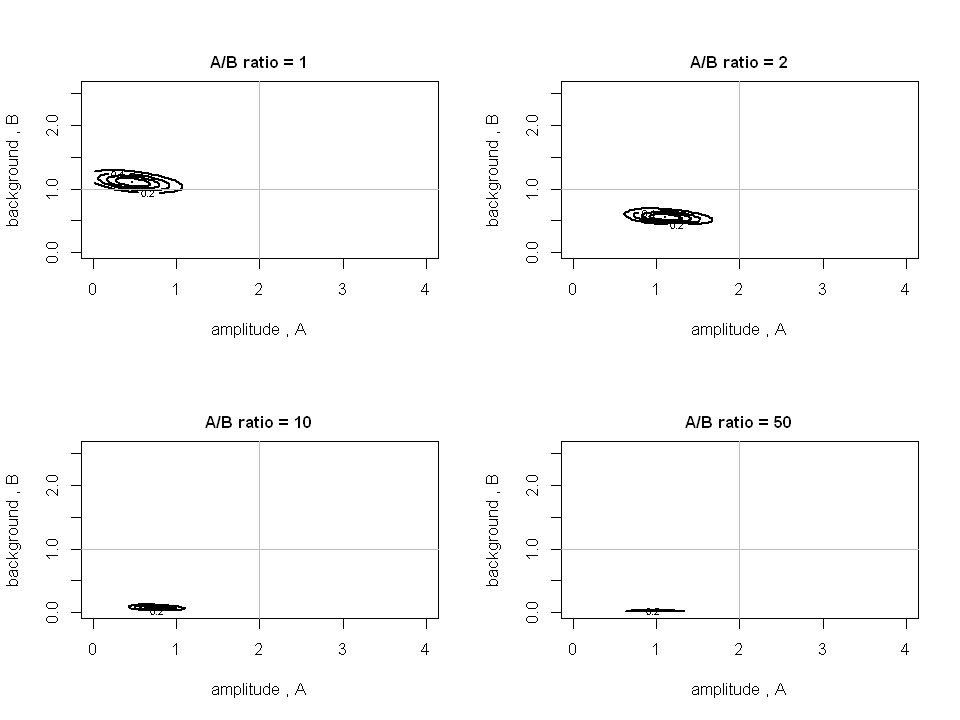

In [23]:
par(mfrow=c(2,2))
set.seed(205)
for (ratio in ratio.list){
z <- z.finder.ratio(ratio,A.true, x0, Delta.t, a, b)
# Plot unnormalized 2D posterior as contours.
contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2,xlab="amplitude , A",ylab="background , B")
abline(v=2,h=1,col="grey")
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1) }

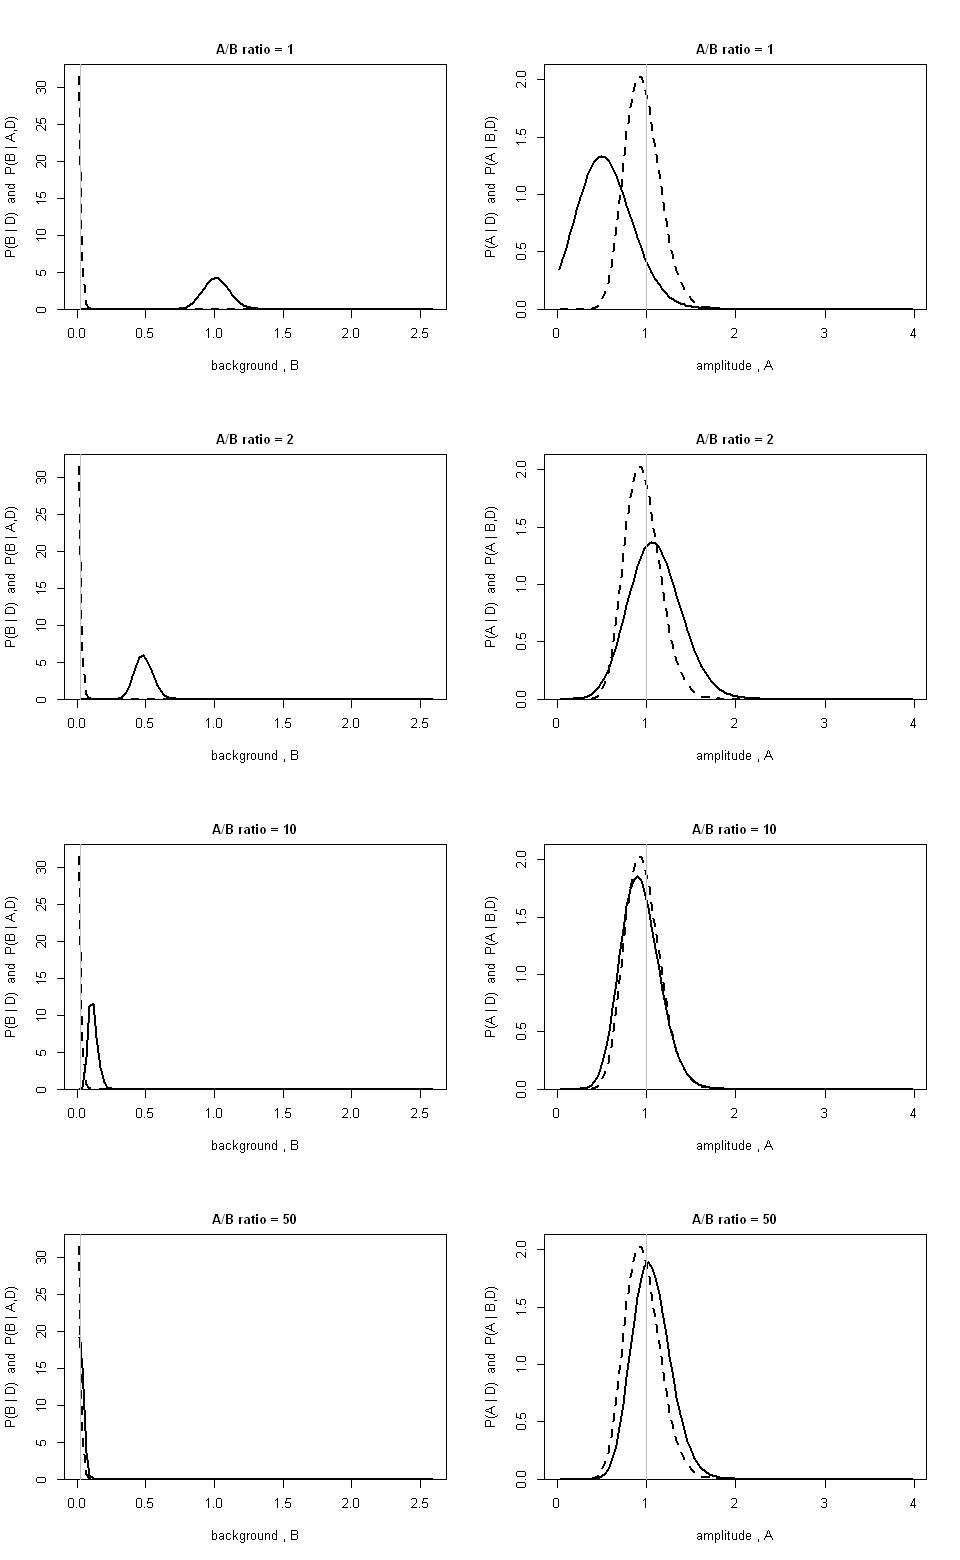

In [24]:
par(mfrow=c(1,2))
par(mfrow=c(4,2))
options(repr.plot.width=8, repr.plot.height =13)  #changing size of plots
for (ratio in ratio.list){
z <- z.finder.ratio(ratio,A.true, x0, Delta.t, a, b)        
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
# using true values of conditioned parameters. Vectorize(func , par)
# makes a vectorized function out of func in the parameter par.
p_a_bD <- exp(Vectorize(log.post , "a")(ddat , xdat , a, B.true ,
x0, w, Delta.t))
p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
p_b_aD <- exp(Vectorize(log.post , "b")(ddat , xdat , A.true , b,
x0, w, Delta.t))
p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
# par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
# Plot the 1D marginalized posteriors
plot(b, p_b_D, xlab="background , B", yaxs="i",
ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)  and  P(B | A,D)",
type="l", lwd=2)
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1)   

lines(b, p_b_aD, lwd=2, lty=2)
abline(v=B.true , col="grey")
plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)",
type="l", lwd=2)
lines(a, p_a_bD, lwd=2, lty=2)
abline(v=A.true , col="grey")
title(main=paste("A/B ratio =", ratio), line=0.7, cex.main=1)   }

In [25]:
for (ratio in ratio.list){
z <- z.finder.ratio(ratio, A.true, x0, Delta.t, a, b)
# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))
# Compute mean , standard deviation , covariance , correlation , of A and B
mean_a <- delta_a * sum(a * p_a_D)
mean_b <- delta_b * sum(b * p_b_D)
sd_a <- sqrt( delta_a * sum((a-mean_a)**2 * p_a_D) )
sd_b <- sqrt( delta_b * sum((b-mean_b)**2 * p_b_D) )
# Covariance nurmalization is performed with ’brute force ’
# The normalization constant is Z = delta_a*delta_b*sum(exp(z)).
# This is independent of (a,b) so can be calculated outside of the loops.
cov_ab <- 0
for(j in 1:length(a)) {
for(k in 1:length(b)) {
cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])}}
    
cov_ab <- cov_ab / sum(exp(z))
rho_ab <- cov_ab / (sd_a * sd_b)
cat("The A/B ratio:", ratio,"\n")
cat("  a = ", mean_a, "+/-", sd_a, "\n")
cat("  b = ", mean_b, "+/-", sd_b, "\n")
cat("rho = ", rho_ab, "\n","\n")}

The A/B ratio: 1 
  a =  1.206016 +/- 0.3609551 
  b =  0.9777218 +/- 0.09590967 
rho =  -0.4103441 
 
The A/B ratio: 2 
  a =  1.10777 +/- 0.2833981 
  b =  0.4429816 +/- 0.06430004 
rho =  -0.3426668 
 
The A/B ratio: 10 
  a =  0.8094651 +/- 0.2199475 
  b =  0.1704119 +/- 0.04069287 
rho =  -0.3106534 
 
The A/B ratio: 50 
  a =  0.7975683 +/- 0.1882657 
  b =  0.04139042 +/- 0.02045491 
rho =  -0.1727852 
 
